In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jhyang\AppData\Local\Temp\ipykernel_16024\125010396.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


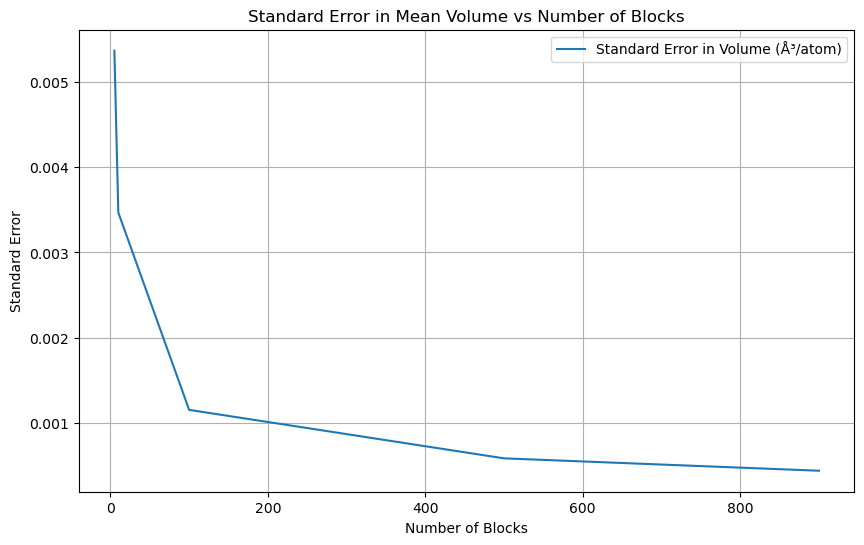

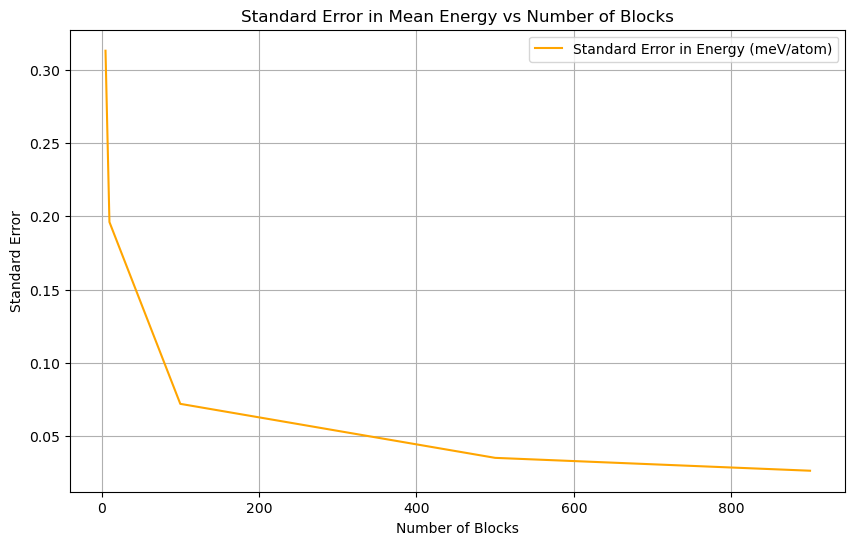

In [12]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])

# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    selected_data = data[column].iloc[:num_blocks]  # Select the first `num_blocks` rows
    mean_value = selected_data.mean()
    std_dev = selected_data.std()
    return std_dev / np.sqrt(num_blocks)

# Calculate standard error for different block sizes
block_sizes = [5, 10, 100, 500, 900]
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'Energy_meV_per_atom', n) for n in block_sizes]

# print('volume_errors:', volume_errors)
# print('energy_errors:', energy_errors)

# Plot the Standard Error for Volume
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, volume_errors, label='Standard Error in Volume (Å³/atom)')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Volume vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()

# Plot the Standard Error for Energy
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, energy_errors, label='Standard Error in Energy (meV/atom)', color='orange')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Energy vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])

# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    selected_data = data[column].iloc[:num_blocks]  # Select the first `num_blocks` rows
    mean_value = selected_data.mean()
    std_dev = selected_data.std()
    return std_dev / np.sqrt(num_blocks)

# Define block sizes
block_sizes = [5, 10, 100, 500, 900]

# Calculate the time step increment between each block (assuming uniform spacing)
time_step_increment = data_after_equil['TimeStep'].iloc[1] - data_after_equil['TimeStep'].iloc[0]  # Calculate step increment
time_per_block = time_step_increment * 0.001  # Convert time per block to picoseconds (assuming 1 step = 0.001 ps)

# Calculate total simulation time for each block size
simulation_times = [n * time_per_block for n in block_sizes]

print('simulation_times:', simulation_times)

# Calculate standard errors for volume and energy for different block sizes
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'Energy_meV_per_atom', n) for n in block_sizes]

# Create the table
table_2_df = pd.DataFrame({
    'Number of Blocks': block_sizes,
    'Simulation Time (picosecond)': simulation_times,
    'Standard Error in the Mean Volume (Å³/atom)': volume_errors,
    'Standard Error in the Mean Energy (meV/atom)': energy_errors
})

# Output the table
print("Table 2 - Error Estimation")
print(table_2_df)

simulation_times: [5.0, 10.0, 100.0, 500.0, 900.0]
Table 2 - Error Estimation
   Number of Blocks  Simulation Time (picosecond)  \
0                 5                           5.0   
1                10                          10.0   
2               100                         100.0   
3               500                         500.0   
4               900                         900.0   

   Standard Error in the Mean Volume (Å³/atom)  \
0                                     0.005368   
1                                     0.003468   
2                                     0.001152   
3                                     0.000583   
4                                     0.000438   

   Standard Error in the Mean Energy (meV/atom)  
0                                      0.313091  
1                                      0.196124  
2                                      0.072015  
3                                      0.035138  
4                                      0.026359  


C:\Users\jhyang\AppData\Local\Temp\ipykernel_16024\623351930.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


C:\Users\jhyang\AppData\Local\Temp\ipykernel_16024\3569141640.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2,


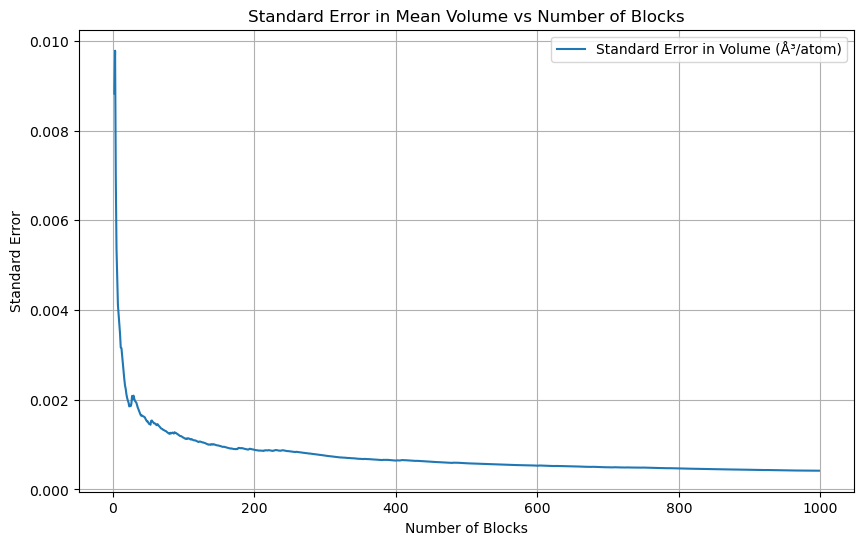

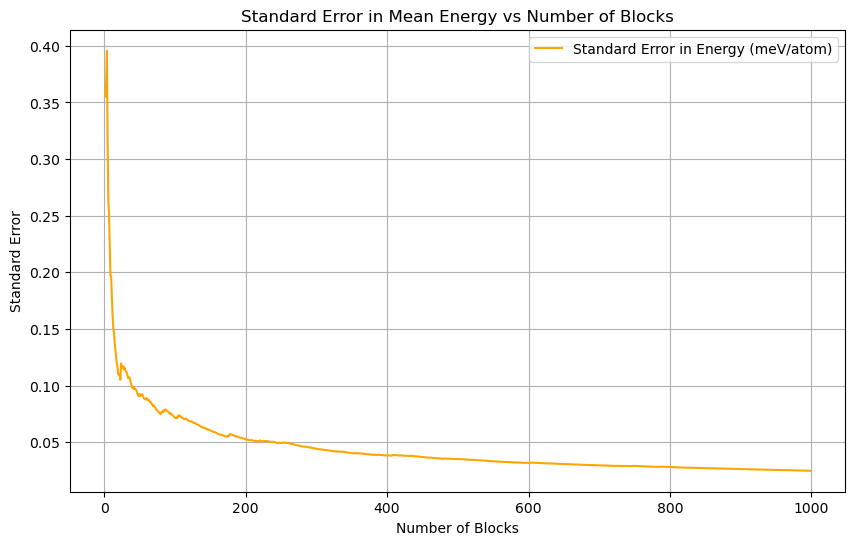

In [14]:
# Load the average data file
average_data_path = r'C:/Users/jhyang/OneDrive/文档/GitHub_Projects/MSE_760/Lab3-Assignment/Problem_1-2/npteqfile_averages.txt'
data = pd.read_csv(average_data_path, delim_whitespace=True, skiprows=2, 
                   names=['TimeStep', 'Temperature_K', 'Pressure_bar', 'Volume_A3', 'TotalEnergy_eV_per_atom'])

# Convert units
data['Volume_per_atom'] = data['Volume_A3'] / 32
data['Energy_meV_per_atom'] = data['TotalEnergy_eV_per_atom'] * 1000

# Use data from the third block onward
data_after_equil = data[2:]

# Function to calculate standard error for a specified number of blocks
def calculate_standard_error(data, column, num_blocks):
    selected_data = data[column].iloc[:num_blocks]  # Select the first `num_blocks` rows
    mean_value = selected_data.mean()
    std_dev = selected_data.std()
    return std_dev / np.sqrt(num_blocks)

# Calculate standard error for different block sizes
block_sizes = range(1, 999)
volume_errors = [calculate_standard_error(data_after_equil, 'Volume_per_atom', n) for n in block_sizes]
energy_errors = [calculate_standard_error(data_after_equil, 'Energy_meV_per_atom', n) for n in block_sizes]

# Plot the Standard Error for Volume
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, volume_errors, label='Standard Error in Volume (Å³/atom)')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Volume vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()

# Plot the Standard Error for Energy
plt.figure(figsize=(10, 6))
plt.plot(block_sizes, energy_errors, label='Standard Error in Energy (meV/atom)', color='orange')
plt.xlabel('Number of Blocks')
plt.ylabel('Standard Error')
plt.title('Standard Error in Mean Energy vs Number of Blocks')
plt.grid(True)
plt.legend()
plt.show()